In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:\\Users\\Yuhao Wu\\Desktop\\machine learning\\project\\train.csv")
test=pd.read_csv("C:\\Users\\Yuhao Wu\\Desktop\\machine learning\\project\\test.csv")


train_id=train['Id']
test_id=test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print(train.columns)
print(train.head(10))
print(train.shape)
print(test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

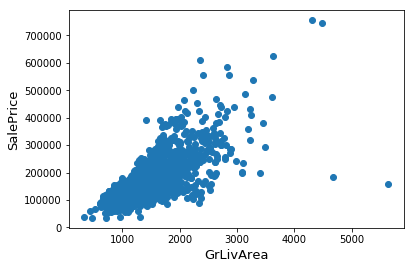

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

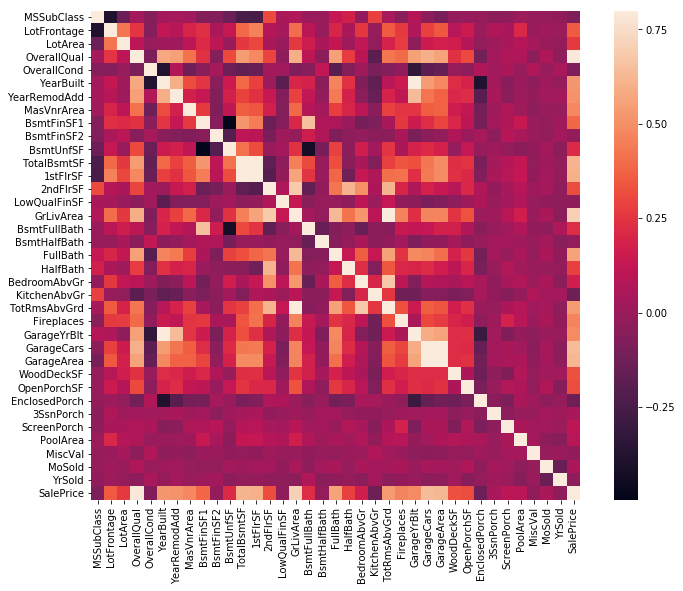

In [4]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


 mu = 180921.20 and sigma = 79415.29



Text(0.5,1,'SalePrice distribution')

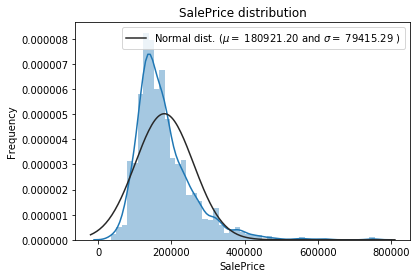

In [5]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 12.02 and sigma = 0.40



Text(0.5,1,'SalePrice distribution')

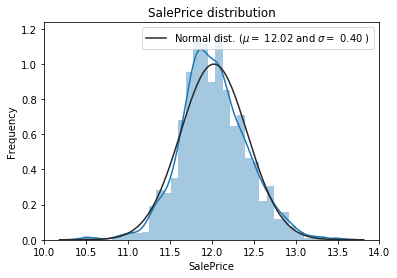

In [6]:
# The target variable is right skewed whereas linear models prefer normally distributed data , 
# So we use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [7]:
# combine train and test data to preprocess
# ntrain = train.shape[0]                                        
# ntest = test.shape[0]
# Y_train = train['SalePrice'].values

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print(data.shape)

(2919, 79)


In [8]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data[missing_data['Percent']>0])


# When more than 10% data is missing, we decide to the corresponding variable, 
# because most of them are not aspects in which we think about when buying a house

data=data.drop(['PoolQC'],axis=1)
data=data.drop(['MiscFeature'],axis=1)
data=data.drop(['Alley'],axis=1)
data=data.drop(['Fence'],axis=1)
data=data.drop(['FireplaceQu'],axis=1)
data=data.drop(['LotFrontage'],axis=1)

              Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
Electrical        1  0.000343
Exterior2nd       1  0.000343
KitchenQual       1  0.000343
GarageCars        1  0.000343
Exterior1st       1  0.000343
GarageArea        1  0.000343
TotalBsmtSF       1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF2        1  0.000343
BsmtFinSF1

In [9]:
# Replacing missing data of categorial variables with None
# Replacing missing data of numeric variables with 0


for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

# NA most likely means no masonry veneer for these houses. 
# We can fill 0 for the area and None for the type.

data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

# MSZoning: 'RL' is the most common value ,so we fillna with the first record
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

# Functional : NA means typical
data["Functional"] = data["Functional"].fillna("Typ")

# Utilities: all records are "AllPub", except for one "NoSeWa" and 2 NA
# this feature won't help in predictive modelling. We can then safely remove it.
data = data.drop(['Utilities'], axis=1)

# Exterior1st and Exterior2nd replace with the most common value
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

# Electrical: 'SBrkr' is the most common value, so we fillna with the first record
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# SaleTpe: replace with the most common value
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

# KitchenQual : only one NA, replace with the most common value
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])



In [10]:
#Check if there are any remaining missing values 
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


In [11]:
#log transform skewed numeric features:
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

In [12]:
# change categorial and some numeric variables to number

data = pd.get_dummies(data)
print(data.shape)

(2919, 276)


In [13]:
# split the train set and test set, also use the StandardScaler to proceed feature scale
from sklearn.preprocessing import StandardScaler
X_train=data[:train.shape[0]]
X_test=data[train.shape[0]:]
Y_train=train.SalePrice

print(X_train.head())

sd=StandardScaler()
X_train=sd.fit_transform(X_train)
X_test=sd.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

   1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0  6.753438  6.751101        0.0             3    6.561031         0.0   
1  7.141245  0.000000        0.0             3    6.886532         0.0   
2  6.825460  6.765039        0.0             3    6.188264         0.0   
3  6.869014  6.629363        0.0             3    5.379897         0.0   
4  7.044033  6.960348        0.0             4    6.486161         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch     ...       \
0           1.0      0.000000   5.017280       0.000000     ...        
1           0.0      0.693147   5.652489       0.000000     ...        
2           1.0      0.000000   6.075346       0.000000     ...        
3           1.0      0.000000   6.293419       5.609472     ...        
4           1.0      0.000000   6.196444       0.000000     ...        

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0             0             0            

In [14]:
# We use the cross_val_score function of Sklearn
# 10-folds Cross-Validation function
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

n_folds = 10

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model,X_train, Y_train, scoring="neg_mean_squared_error", cv = n_folds))
    return(rmse)

RMSE of ridge is  0.1262979712866668


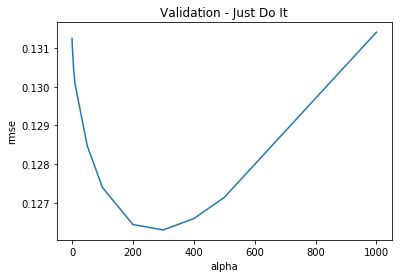

In [15]:
# L2 Ridge regularization

alphas = [0.05, 0.1, 1, 5, 10, 50,100,200,300,400,500,1000]
Ridge_cv = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Ridge_cv = pd.Series(Ridge_cv, index = alphas)
Ridge_cv.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

print("RMSE of ridge is ",Ridge_cv.min())

In [16]:
# # L1 Lasso regularization

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.005]).fit(X_train, Y_train)
print("RMSE of lasso model is ",rmse_cv(model_lasso).mean())
lasso_pred=model_lasso.predict(X_test)

acc_lasso = round(model_lasso.score(X_train, Y_train) * 100, 2)
print("Accuracy of random forest is ",acc_lasso)

RMSE of lasso model is  0.12288948287560619
Accuracy of random forest is  93.13


In [17]:
# It is easy for us to find the Lasso performs better
# Due to this type regularization, we can remove some irrelated variables and find important variables

coef = pd.Series(model_lasso.coef_, index = data.columns)

print("We choose " + str(sum(coef != 0)) + " variables and remove the other " +  str(sum(coef == 0)) + " variables")

We choose 86 variables and remove the other 190 variables


Text(0.5,1,'Coefficients in the Lasso Model')

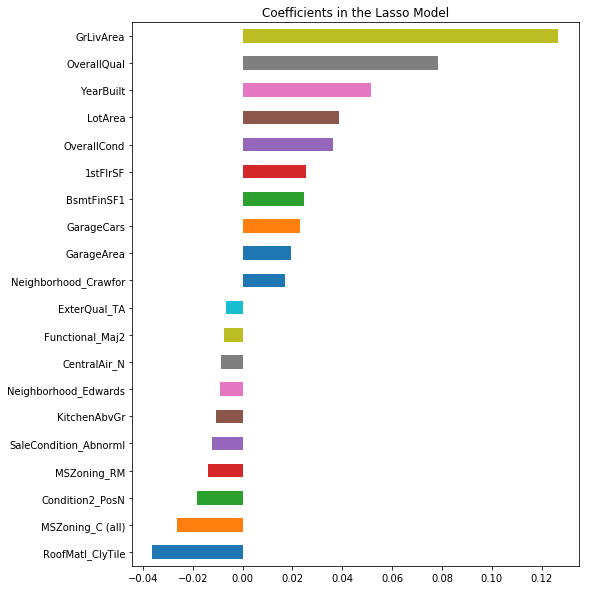

In [18]:
# plot the top 10 positive and negative relative variables
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [19]:
# random forest
from sklearn.ensemble import RandomForestRegressor


random_forest = RandomForestRegressor() 
random_forest.fit(X_train, Y_train)
random_forest_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy of random forest is ",acc_random_forest)

# best parameter
best_rf = RandomForestRegressor(
    max_depth = 15,
    min_samples_leaf = 1,
    n_estimators = 100,                                                                  
    random_state=42)
best_rf.fit(X_train, Y_train)
best_rf_pred = best_rf.predict(X_test) # RF predictions

acc_best_rf=round(best_rf.score(X_train,Y_train)*100,2)
print("When choose the best parameter, Accuracy of random forest is ",acc_best_rf)

Accuracy of random forest is  97.73
When choose the best parameter, Accuracy of random forest is  98.16


In [20]:
random_forest_pred = np.expm1(random_forest_pred)
best_rf_pred=np.expm1(best_rf_pred)
lasso_pred=np.expm1(lasso_pred)

In [21]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = lasso_pred
sub.to_csv('submission_lasso.csv',index=False)